# Can we predict heart disease?

Being the leading cause of deaths worldwide, a way of predicting a person's likelihood of developing heart disease would be huge.



In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from scipy.stats import uniform, poisson
import time

In [2]:
df = pd.read_csv('/Users/fredhome/Documents/SQL/SQL datasets/CVD.csv')
df.sample(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
102955,Very Good,Within the past year,No,No,No,No,No,No,No,Female,80+,163.0,63.50,24.03,No,0.0,30.0,30.0,0.0
190574,Good,Within the past year,Yes,No,No,No,No,No,No,Female,45-49,163.0,77.11,29.18,Yes,8.0,1.0,4.0,4.0
100850,Excellent,Within the past 2 years,Yes,No,No,No,No,No,No,Male,60-64,180.0,111.13,34.17,No,12.0,30.0,30.0,4.0
131135,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,55-59,157.0,83.46,33.65,No,4.0,8.0,25.0,4.0
119467,Excellent,Within the past 2 years,No,No,Yes,No,No,No,Yes,Male,70-74,170.0,72.57,25.06,No,0.0,60.0,12.0,5.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [4]:
df.duplicated().sum()

80

There's no true ways of identifying uniqueness between rows in this dataset, so we will keep all the information.

In [5]:
df.describe(include='all')

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854.000000,308854.000000,308854.000000,308854,308854.000000,308854.000000,308854.000000,308854.000000
unique,5,5,2,2,2,2,2,4,2,2,13,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
freq,110395,239371,239381,283883,278860,278976,246953,259141,207783,160196,33434,NaN,NaN,NaN,183590,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.615249,83.588655,28.626211,NaN,5.096366,29.835200,15.110441,6.296616
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.658026,21.343210,6.522323,NaN,8.199763,24.875735,14.926238,8.582954
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.000000,24.950000,12.020000,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.000000,68.040000,24.210000,NaN,0.000000,12.000000,4.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.000000,81.650000,27.440000,NaN,1.000000,30.000000,12.000000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.000000,95.250000,31.850000,NaN,6.000000,30.000000,20.000000,8.000000


We are not interested in when a patient's last checkup was, as the frequency of their past checkups doesn't change
them having heart disease now.

In [6]:
df.drop(['Checkup'], axis=1, inplace=True)

In [7]:
df.Diabetes.unique()

array(['No', 'Yes', 'No, pre-diabetes or borderline diabetes',
       'Yes, but female told only during pregnancy'], dtype=object)

We only want yes and no.

In [8]:
df.Diabetes = df.Diabetes.str.replace('No, pre-diabetes or borderline diabetes', 'No')
df.Diabetes = df.Diabetes.str.replace('Yes, but female told only during pregnancy', 'Yes')
df.Diabetes.unique()

array(['No', 'Yes'], dtype=object)

In [9]:
df.isna().sum()

General_Health                  0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

We need to change the discrete columns into binary

In [10]:
mapper = {'Yes': 1, 'No': 0}
gender = {'Male': 1, 'Female': 0}
df.Exercise = [mapper[item] for item in df.Exercise]
df.Heart_Disease = [mapper[item] for item in df.Heart_Disease]
df.Skin_Cancer = [mapper[item] for item in df.Skin_Cancer]
df.Other_Cancer = [mapper[item] for item in df.Other_Cancer]
df.Depression = [mapper[item] for item in df.Depression]
df.Diabetes = [mapper[item] for item in df.Diabetes]
df.Arthritis = [mapper[item] for item in df.Arthritis]
df.Smoking_History = [mapper[item] for item in df.Smoking_History]
df.Sex = [gender[item] for item in df.Sex]

df.head()

,General_Health,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,0,0,0,0,0,0,1,0,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,Very Good,0,1,0,0,0,1,0,0,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,Very Good,1,0,0,0,0,1,0,0,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,Poor,1,1,0,0,0,1,0,1,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,Good,0,0,0,0,0,0,0,1,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [11]:
df.General_Health.unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

In [12]:
encoder = OrdinalEncoder(categories=[['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']])
# reshape our feature
condition_reshaped = df.General_Health.values.reshape(-1,1)
# create new variable with assigned numbers
df['Health_Rating'] = encoder.fit_transform(condition_reshaped)

In [13]:
df.dtypes

General_Health                   object
Exercise                          int64
Heart_Disease                     int64
Skin_Cancer                       int64
Other_Cancer                      int64
Depression                        int64
Diabetes                          int64
Arthritis                         int64
Sex                               int64
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                   int64
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
Health_Rating                   float64
dtype: object

In [14]:
df = df.astype({'Health_Rating': 'category', 'Sex': 'category'})

In [15]:
df.dtypes

General_Health                    object
Exercise                           int64
Heart_Disease                      int64
Skin_Cancer                        int64
Other_Cancer                       int64
Depression                         int64
Diabetes                           int64
Arthritis                          int64
Sex                             category
Age_Category                      object
Height_(cm)                      float64
Weight_(kg)                      float64
BMI                              float64
Smoking_History                    int64
Alcohol_Consumption              float64
Fruit_Consumption                float64
Green_Vegetables_Consumption     float64
FriedPotato_Consumption          float64
Health_Rating                   category
dtype: object

In [16]:
ohe = pd.get_dummies(df.Age_Category)

df = df.join(ohe)

In [17]:
df.shape

(308854, 32)

Because we have used one-hot-encoding, we know have 32 features. Time for some feature engineering.

In [18]:
df.sample()

,General_Health,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,...,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80+
9050,Good,1,0,0,0,0,0,0,0,50-54,...,0,0,0,1,0,0,0,0,0,0


/var/folders/7w/235ps8kx5fz_tctwc7ghsxjm0000gn/T/ipykernel_10209/2582347099.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


                              Heart_Disease
Exercise                          -0.096347
Skin_Cancer                        0.090848
Other_Cancer                       0.092387
Depression                         0.032526
Diabetes                           0.172204
Arthritis                          0.153913
Height_(cm)                        0.015780
Weight_(kg)                        0.045875
BMI                                0.042666
Smoking_History                    0.107797
Alcohol_Consumption               -0.036569
Fruit_Consumption                 -0.020055
Green_Vegetables_Consumption      -0.024043
FriedPotato_Consumption           -0.009227
18-24                             -0.070569
25-29                             -0.062012
30-34                             -0.064630
35-39                             -0.066256
40-44                             -0.061058
45-49                             -0.048030
50-54                             -0.036866
55-59                           

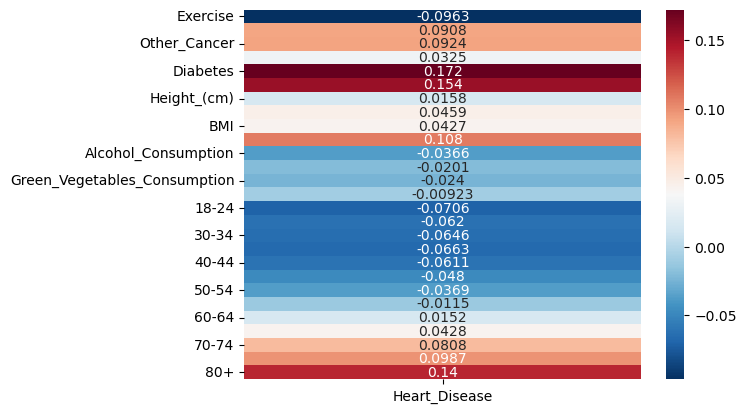

In [19]:
corr_matrix = df.corr()
hd = corr_matrix[['Heart_Disease']].drop(labels=['Heart_Disease'])
print(hd)
sns.heatmap(hd, annot=True, fmt='.3', cmap='RdBu_r')
plt.show()

Fried potato consumption has little if any correlation with heart disease, so we'll remove this feature

In [20]:
df.drop(['FriedPotato_Consumption', 'General_Health', 'Age_Category'], axis=1, inplace=True)

There are too many features for sequential feature selection so it will be computationally expensive.

Regularisation is a good next choice for feature selection.

There is multicollinearity between independent variables, so Ridge is ideal to use.

The default regularisation of logistic regression in sci-kit learn is Ridge.

We need to standardise the data as we are using regression.

In [21]:
scaler = StandardScaler()

In [22]:
y = df['Heart_Disease']
X = df.drop(columns = ['Heart_Disease'])
X_scaled = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0)

Let's use cross validation with 5 folds, to find the optimum value of C.

In [74]:
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV( Cs=np.logspace(-3,2, 100),
                                  penalty='l2',
                                scoring='accuracy', cv=5,
                                  random_state=0,max_iter=10000)
start_time1 = time.time()
model.fit(X_train, y_train)

duration_log = time.time() - start_time1

print(model.C_, model.scores_[1].mean(axis=1).max())
print(duration_log)

[0.00141747] 0.9197579780237572
33.51040697097778


model.C_ gives an array of C that maps to the best scores across every class.

model.scores_ provides a dictionary with an array of the score of each C value for each of the 5 folds as the dict value.

In [76]:
print(model.scores_[1].mean(axis=1))

[0.91975798 0.91945727 0.91880385 0.91897139 0.91965376]


In [25]:
model.coef_

array([[-0.02215637,  0.0457991 ,  0.02384275,  0.08892784,  0.19255291,
         0.13952642,  0.37341915, -0.03631627,  0.00660675,  0.015152  ,
         0.19172625, -0.08132184,  0.00111631,  0.01328667,  0.57251861,
        -0.34097173, -0.27944324, -0.25325657, -0.26314911, -0.20277311,
        -0.11761007, -0.03858758,  0.04423164,  0.12024104,  0.20225379,
         0.26974469,  0.28624857,  0.36573116]])

In [26]:
print(model.score(X_train, y_train))
model.score(X_test,y_test)

0.9194238373340132


0.9198167424843373

The model performs similarly on the training and test set, meaning we have struck a good bias-variance balance.

The Logistic Regression model with ridge regularisation can classify the data with a 91.98% accuracy.

Can Lasso or elasticnet perform better?

The liblinear solver is too slow, but using l1_ratios=1 is equivalent to using Lasso regularisation.

In [27]:
modelElastic = LogisticRegressionCV( Cs=np.logspace(-3,2, 100),
                                  penalty='elasticnet', solver = 'saga',
                                scoring='accuracy', cv=5,
                                  random_state=42,max_iter=10000, l1_ratios=[1])
modelElastic.fit(X_train, y_train)
modelElastic.score(X_test, y_test)

0.9196548542196176

Logistic Regression with ridge penalty works slight better than Lasso.

Another classifier we could use is a random forest.

Let's start with a Decision Tree

In [77]:
simple = DecisionTreeClassifier(random_state=0)

In [78]:
simple.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [79]:
print(simple.score(X_train, y_train))
simple.score(X_test, y_test)

0.9998704888640659


0.8630425280471419

The model performs extremely well on the training set, but not as well on the test set. The model is overfitted.

In [80]:
print(simple.tree_.node_count)
simple.tree_.max_depth

52863


44

In [81]:
parameters = {'criterion': Categorical(['gini','entropy']),
              'max_depth': Integer(1,44,prior='log-uniform'),
              'min_samples_split': Real(1e-3,1.0,prior='log-uniform'),
              'max_leaf_nodes': Integer(3,50000,prior='uniform')}
              

b1 = BayesSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_iter=20, random_state=0, n_jobs=-1)

In [82]:
start_time2 = time.time()
b1.fit(X_train, y_train)

duration_bayestree = time.time() - start_time2

In [83]:
print(duration_bayestree)

20.621856927871704


In [35]:
np.__version__

'1.23.5'

If you are going to try this for yourself, you need to downgrade to this version of numpy as skopt 0.9 is not compatible with the newest version of numpy.

In [50]:
b1.best_params_

OrderedDict([('criterion', 'gini'),
             ('max_depth', 7),
             ('max_leaf_nodes', 16756),
             ('min_samples_split', 0.0034316856237309006)])

In [51]:
print(b1.score(X_train, y_train))
b1.score(X_test, y_test)

0.9194683567869906


0.9189911123342669

A vast improvement compared to the decision tree with no hyperparameter tuning

In [85]:
diff = model.score(X_test,y_test) - b1.score(X_test, y_test)
print(f"This tuned logistic regression model is {diff*100}% more accurate) but take \
{duration_log - duration_bayestree} seconds longer")

This tuned logistic regression model is 0.08256301500704222% more accurate) but take 12.888550043106079 seconds longer


This is such a small increase, that if our dataset was larger, we'd definitely choose the tuned decision tree as it is less computationally expensive.